## Feedback Prize - English Language Learning: Multi-Label Regression with TFIDF

## Import Packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split, KFold
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import gensim
from nltk.tokenize import word_tokenize

## Loading data

In [74]:
df = pd.read_csv('/kaggle/input/580-final-train/new_train.csv')
#df['split'] = np.random.randn(df.shape[0], 1)

#msk = np.random.rand(len(df)) <= 0.8

#train = df[msk]
#test = df[~msk]
train = df

In [75]:
train.head()

,Unnamed: 0,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_length,...,adb,pronoun,noun,adj,fw,number,punc,total_score,ease_score,readability
0,0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261,...,13,32,47,19,0,0,19,20.0,90.60,Very Easy
1,1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,...,25,57,89,42,0,2,18,14.5,66.64,Standard
2,2,00299B378633,"Dear, Principal If u change the school policy...",3.0,3.5,3.0,3.0,3.0,2.5,320,...,15,32,68,21,0,0,26,18.0,79.80,Fairly Easy
3,3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728,...,46,125,94,56,0,2,79,27.0,76.35,Fairly Easy
4,4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,...,5,30,59,12,0,1,3,16.5,17.69,Very Confusing


In [76]:
text_list = []
for i in train.full_text:
    j = word_tokenize(i)
    text_list.append(j)

In [77]:
len(text_list)

3911

In [78]:
model = gensim.models.Word2Vec(text_list, vector_size=1000, window=10,min_count=1)

In [7]:
#model.wv.key_to_index

In [79]:
vector_dict = {}
for word in model.wv.index_to_key: 
    vector_dict[word] = model.wv.get_vector(word)

vec_df = pd.DataFrame(vector_dict).T
vec_df = vec_df.iloc[1:, :]
vec_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
.,-0.300821,-0.328050,0.078081,-0.999941,0.161496,-0.630551,0.355221,-0.901573,0.356282,-0.016072,...,0.349282,-0.139482,0.241133,0.104224,-0.623918,0.046159,-0.451607,-0.170867,-0.061160,0.377532
",",-0.155954,0.318919,-0.221701,0.378037,0.400419,0.435140,0.481697,-0.238347,0.573693,0.183060,...,0.233555,0.149909,0.539308,-0.162150,-0.033392,0.112049,-0.055094,0.139186,-0.137411,0.035812
the,0.305576,-0.142962,0.107298,0.601553,0.122722,0.000579,0.367330,0.753535,-0.012186,0.463155,...,0.282804,-0.385248,-0.652918,-0.173750,0.419263,-0.065131,-0.444365,0.705157,0.033696,-0.103320
and,-0.043420,-0.277994,0.063037,0.191112,0.193165,-0.264527,0.539254,-0.070743,0.307968,0.059453,...,0.474300,-0.342638,0.108595,0.281179,0.273203,-0.007770,0.276724,0.368772,-0.051658,0.230351
you,-0.064345,-0.859024,0.312005,0.794862,0.355029,-1.568271,0.026833,-0.719532,-0.615809,1.124385,...,-0.376836,-0.355350,-0.126729,1.033284,-0.258498,0.926324,0.646114,-0.852922,-0.330643,-0.054688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell-phone,0.007698,-0.004866,-0.001361,0.006956,-0.007184,0.006007,-0.004711,0.008007,-0.001391,0.000467,...,0.006647,-0.002729,-0.003750,-0.004950,0.002307,0.000886,-0.002772,-0.001343,-0.001409,-0.002543
donr,-0.000875,0.004867,-0.001144,-0.009395,-0.000096,0.002676,-0.000743,-0.001368,0.002197,0.001491,...,0.007932,-0.007528,0.004567,-0.000968,0.007206,-0.002395,-0.001307,-0.002693,-0.002883,-0.004148
undertan,-0.002357,0.007396,-0.001341,-0.011021,0.004316,0.005283,-0.002770,-0.005478,-0.000262,0.003789,...,0.007727,-0.006132,0.005265,-0.004320,0.006208,-0.003167,-0.000769,-0.000914,-0.002467,-0.003727
Latinos,0.006223,-0.000716,0.003084,0.004574,-0.006635,-0.004295,0.001038,0.008378,-0.011302,-0.001466,...,0.004129,-0.006823,0.012487,-0.004298,0.003190,0.004556,-0.003984,-0.012686,-0.005059,-0.006417


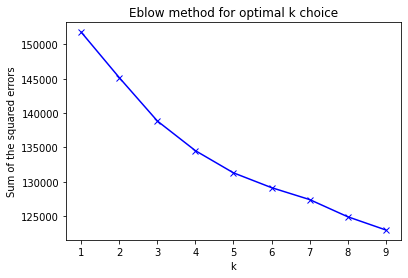

In [80]:
dict = []
# Try k for different values
##find the best k value
r = range(1, 10)
for k in r:
    #print(k)
    k_means = KMeans(n_clusters=k)
    kmean_model = k_means.fit(vec_df)
    dict.append(k_means.inertia_)
plt.plot(r, dict, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of the squared errors')
plt.title('Eblow method for optimal k choice')
plt.show()

## Preprocessing

In [81]:
vocabulary_size = 3200
use_k_fold = True
target_columns = ["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]

In [82]:
train["text"] = train["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
test["text"] = test["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
vectorizor = keras.layers.TextVectorization(
    max_tokens=vocabulary_size, 
    output_mode="tf-idf", 
    ngrams=2
)
vectorizor.adapt(list(train["text"]) + list(test["text"]))

## Building Model

In [83]:
lr=0.1
batch_size=32
embedding_space_dim=200
epochs=40

In [84]:
import keras
from tensorflow.keras import optimizers
def build_model():
    model = keras.models.Sequential()
    model.add(keras.Input(shape=(), dtype="string"))
    model.add(vectorizor)
    #model.add(keras.layers.Dense(128, activation='swish'))
    model.add(keras.layers.Dense(64, activation='softmax'))  ## change the layer dense to 32
    model.add(keras.layers.Dense(32, activation='softmax'))
    #model.add(keras.layers.Dense(16, activation='swish'))
    model.add(keras.layers.Dense(6))
    #model.add(keras.layers.Dropout(0.05))
    rmse = tf.keras.metrics.RootMeanSquaredError(name="rmse")
    model.compile(loss="mse", optimizer="adam", metrics=[rmse])
    return model

In [85]:
model = build_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 3200)              1         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                204864    
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 198       
Total params: 207,143
Trainable params: 207,142
Non-trainable params: 1
_________________________________________________________________


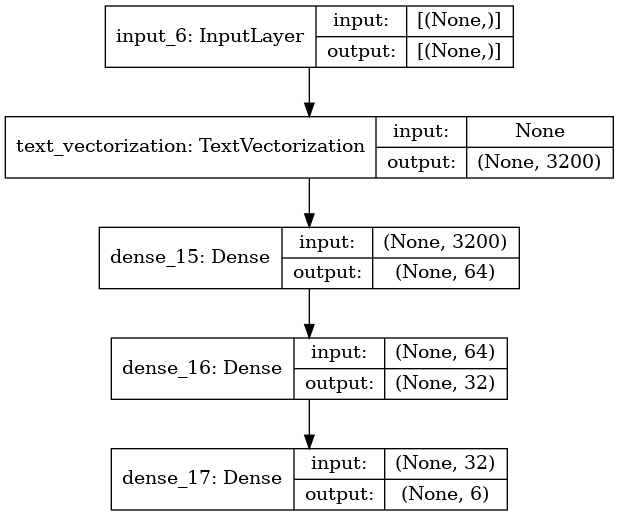

In [86]:
from tensorflow.keras.utils import plot_model
#keras.utils.plot_model(model, show_shapes=True)
plot_model(model, show_shapes=True)

## Training models

In [87]:
keras.backend.clear_session()
kfold = KFold(n_splits=5, shuffle=True, random_state=42) ## as the k means cluster results, we choose n_splits = 5
models = []
all_rmse_history = []
for i, (train_set, val_set) in enumerate(kfold.split(train)):
    x_train = train.iloc[train_set]["text"]
    y_train = train.iloc[train_set][target_columns]
    x_val = train.iloc[val_set]["text"]
    y_val = train.iloc[val_set][target_columns]
    model = build_model()
    rmse = tf.keras.metrics.RootMeanSquaredError(name="rmse")
    early_stop = keras.callbacks.EarlyStopping(monitor="val_rmse", mode="min", patience=5)
    model.compile(loss="mse", optimizer="adam", metrics=[rmse])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_val, y_val),callbacks=[early_stop])
    result = model.evaluate(x_val, y_val)
    print("Loss:", result[0], "RMSE:", result[1])
    all_rmse_history.append(result[1])
    models.append(model) 
    if not use_k_fold:
        break
print(f"Mean RMSE:{np.mean(all_rmse_history)}")

Epoch 1/40
98/98 [==============================] - 2s 17ms/step - loss: 9.3546 - rmse: 3.0585 - val_loss: 8.6811 - val_rmse: 2.9464
Epoch 2/40
98/98 [==============================] - 1s 14ms/step - loss: 8.1670 - rmse: 2.8578 - val_loss: 7.5533 - val_rmse: 2.7483
Epoch 3/40
98/98 [==============================] - 1s 14ms/step - loss: 7.0834 - rmse: 2.6615 - val_loss: 6.5218 - val_rmse: 2.5538
Epoch 4/40
98/98 [==============================] - 2s 18ms/step - loss: 6.0917 - rmse: 2.4681 - val_loss: 5.5769 - val_rmse: 2.3615
Epoch 5/40
98/98 [==============================] - 2s 16ms/step - loss: 5.1869 - rmse: 2.2775 - val_loss: 4.7212 - val_rmse: 2.1728
Epoch 6/40
98/98 [==============================] - 1s 14ms/step - loss: 4.3704 - rmse: 2.0906 - val_loss: 3.9518 - val_rmse: 1.9879
Epoch 7/40
98/98 [==============================] - 1s 14ms/step - loss: 3.6365 - rmse: 1.9070 - val_loss: 3.2613 - val_rmse: 1.8059
Epoch 8/40
98/98 [==============================] - 1s 14ms/step - lo

## Output

In [88]:
preds = []
for model in models:
    preds.append(model.predict(test["text"]))
pred = np.mean(preds, axis=0)
output = pd.DataFrame({
    "text_id": test["text_id"]
})
#print(output)
for i in range(len(target_columns)):
    column = target_columns[i]
    #print(column)
    output[column] = pred[:,i]
pred = np.mean(preds, axis=0)
output.to_csv("output.csv", index=False)

In [89]:
test

,Unnamed: 0,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_length,...,noun,adj,fw,number,punc,total_score,ease_score,readability,split,text
6,6,005661280443,Imagine if you could prove other people that y...,3.5,4.0,3.5,3.5,4.0,4.0,431,...,80,39,0,0,27,22.5,72.60,Fairly Easy,0.183215,imagine if you could prove other people that y...
18,18,017802562E71,"March 12, 20019 The technology allows people ...",3.0,2.0,3.5,2.5,2.5,2.5,227,...,68,20,0,3,29,16.0,62.17,Standard,-1.878555,"march 12 , 20019 the technology allows people ..."
25,25,01C53183305A,They are some Schools offer for Students to Le...,2.0,2.0,2.5,2.0,3.0,2.0,183,...,50,8,0,0,17,13.5,82.07,Easy,-0.532879,they are some schools offer for students to le...
30,30,02B36EBD5C66,"Students can benefit from this option, but als...",4.0,4.0,4.5,3.5,3.5,4.0,419,...,87,27,0,2,43,23.5,79.80,Fairly Easy,1.106921,"students can benefit from this option , but al..."
35,35,037C88B5B111,Most of the schools in around the world that c...,4.0,3.5,3.5,3.0,3.0,3.5,698,...,184,46,0,7,78,20.5,76.66,Fairly Easy,1.126846,most of the schools in around the world that c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3884,FEE662801AF4,I think that homework clubs are good in school...,2.5,2.0,2.5,2.5,2.5,2.0,361,...,95,17,0,2,27,14.0,77.10,Fairly Easy,0.055349,i think that homework clubs are good in school...
3889,3889,FF4CBDA0E418,It has been said that first impressions are al...,3.5,2.5,3.0,2.5,2.5,2.5,222,...,43,23,0,1,11,16.5,43.33,Difficult,-0.781802,it has been said that first impressions are al...
3890,3890,FF6224AC70C6,A city council is having arguments to adopt cu...,3.5,3.5,3.5,3.5,2.5,3.5,852,...,201,84,0,1,68,20.0,70.02,Fairly Easy,0.010361,a city council is having arguments to adopt cu...
3895,3895,FF7FE6BD8509,I agree that first impression is almost imposs...,3.5,3.5,3.5,3.5,3.5,3.5,622,...,100,55,0,2,34,21.0,75.84,Fairly Easy,-0.442930,i agree that first impression is almost imposs...


In [90]:
output

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
6,005661280443,3.353502,3.264877,3.460939,3.361645,3.275014,3.313318
18,017802562E71,2.973431,2.865391,3.052664,2.958060,2.883219,2.919145
25,01C53183305A,2.586677,2.469865,2.662541,2.535408,2.479360,2.530238
30,02B36EBD5C66,3.195640,3.118077,3.297820,3.189371,3.123254,3.147935
35,037C88B5B111,3.253387,3.173690,3.355897,3.251118,3.179252,3.205830
...,...,...,...,...,...,...,...
3884,FEE662801AF4,2.866553,2.756603,2.938041,2.828844,2.762316,2.800669
3889,FF4CBDA0E418,2.801498,2.692810,2.873059,2.767328,2.700477,2.743158
3890,FF6224AC70C6,3.353767,3.265093,3.461246,3.361954,3.275265,3.313627
3895,FF7FE6BD8509,3.250798,3.162697,3.357892,3.266906,3.181418,3.224651
